## Regression and Error

#### Submitted by Nitin Reddy K

In [7]:
import numpy as np
import seaborn as sns
import math

In [8]:
m = 200
w = 1
b = 5
sd = math.sqrt(0.1)

In [9]:
x = list(np.random.uniform(low=100,high =102, size=m))

In [10]:
y = list(map(lambda i : w*i + b + np.random.normal(0,sd,1), x))

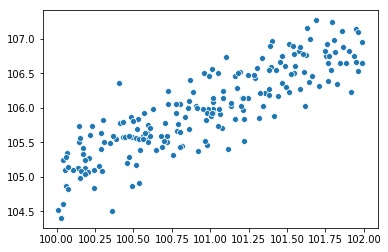

In [11]:
sns.scatterplot(x,y)

In [17]:
def check_parameters(w,b,m,sd) :
    w_org = []
    b_org = []
    w_dash = []
    b_dash = []
    for i in range(1000):
        x = list(np.random.uniform(low=100,high =102, size=m))
        x_dash = list(map(lambda j : j - 101, x))
        y_temp = [((w*j) + b) for j in x]
        e = list(np.random.normal(0, sd, size = m))
        y = [a + b for a, b in zip(y_temp, e)]
        w_temp = np.cov(x,y)[0][1]/ np.var(x)
        w_org.append(w_temp)
        b_org.append(np.mean(y) - (w_temp * np.mean(x)))
        w_dash_temp = np.cov(x_dash,y)[0][1]/ np.var(x_dash)
        w_dash.append(w_dash_temp)
        b_dash.append(np.mean(y) - (w_dash_temp * np.mean(x_dash)))
    print("The expected value of w is : ", np.mean(w_org))
    print("The variance of w is : ", np.var(w_org))
    print()
    print("The expected value of b is : ", np.mean(b_org))
    print("The variance of b is : ", np.var(b_org))
    print()
    print("The expected value of w_dash is : ", np.mean(w_dash))
    print("The variance of w_dash is : ", np.var(w_dash))
    print()
    print("The expected value of b_dash is : ", np.mean(b_dash))
    print("The variance of b_dash is : ", np.var(b_dash))

In [18]:
check_parameters(w,b,m,sd)

The expected value of w is :  1.0035367302287947
The variance of w is :  0.0014555703102013702

The expected value of b is :  4.643040453497059
The variance of b is :  14.851229282449953

The expected value of w_dash is :  1.0035367302287947
The variance of w_dash is :  0.0014555703102013733

The expected value of b_dash is :  106.00025020660533
The variance of b_dash is :  0.00047436339741031163


As expected from our analysis, we can see that variance of b for re-centered data is smaller than the original one. These results are inline with our conclusion of problem 4.

Also from problem 3, the limiting expression for variance are following

\begin{align*}
   Var(\hat{w}) \approx  \dfrac{\sigma^2}{m} \dfrac{1}{Var(x)} \\
   Var(\hat{b}) \approx  \dfrac{\sigma^2}{m} \dfrac{E[x^2]}{Var(x)} \\
\end{align*}

Let us know manually calculate the variance for w and b - 

In [27]:
x = list(np.random.uniform(low=100,high =102, size=m))
x_dash = list(map(lambda j : j - 101, x))
y_temp = [((w*j) + b) for j in x]
e = list(np.random.normal(0, sd, size = m))
y = [a + b for a, b in zip(y_temp, e)]

In [33]:
Var_w = sd**2*(1 / m) * (1 /np.var(x))
print("The limiting variance of w is ", Var_w)

The limiting variance of w is  0.0015402727974052977


In [34]:
Var_w_dash = sd**2*(1 / m) * (1 /np.var(x_dash))
print("The limiting variance of w_dash is ", Var_w_dash)

The limiting variance of w_dash is  0.001540272797405298


In [35]:
Var_b = sd**2*(1 / m) * np.mean([i**2 for i in x])*(1 /np.var(x))
print("The limiting variance of b is ", Var_b)

The limiting variance of b is  15.739453951978458


In [36]:
Var_b_dash = sd**2*(1 / m) * np.mean([i**2 for i in x_dash])*(1 /np.var(x_dash))
print("The limiting variance of b_dash is ", Var_b_dash)

The limiting variance of b_dash is  0.0005112748689193981


As we can see, these values are almost same as what we got from the simulation.